In [1]:
%run mnist_yolo_data.ipynb

In [2]:
from keras.models import load_model
from matplotlib import patches

Using TensorFlow backend.


In [3]:
def transform_coord(coord):
    w = h = coord[12] * 86
    x = coord[10]*86 - w/2
    y = coord[11]*86 - w/2
    return (x, y), w, h

In [4]:
def plot_results(batch, pred):
    fig, axList = plt.subplots(8,4)
    fig.set_size_inches(8,14)
    for i, ax in enumerate(axList.flatten()):
        ax.set_axis_off()
        ax.imshow(batch[0][i].reshape(86,86), cmap='gray')
        
        ax.set_title(str(pred[i][:10].argmax()) +':- '+ str(pred[i][:10].max()) if batch[1][i][:10].argmax() != pred[i][:10].argmax() else str(' '))
        c1, c2, c3 = transform_coord(batch[1][i])
        rec = patches.Rectangle(c1, c2, c3, edgecolor='y', fill=False, linewidth=1)
        ax.add_patch(rec)
        
        c1, c2, c3 = transform_coord(pred[i])
        rec = patches.Rectangle(c1, c2, c3, edgecolor='r', fill=False, linewidth=1)
        ax.add_patch(rec)

In [5]:
train, val, test = load_data()
x_test, y_test = test

test_gen = DataGenerator(x_test, y_test)

model = load_model('mnist_basic_yolo.h5')

In [6]:
batch = test_gen.gen_batch()
pred = model.predict(batch[0])

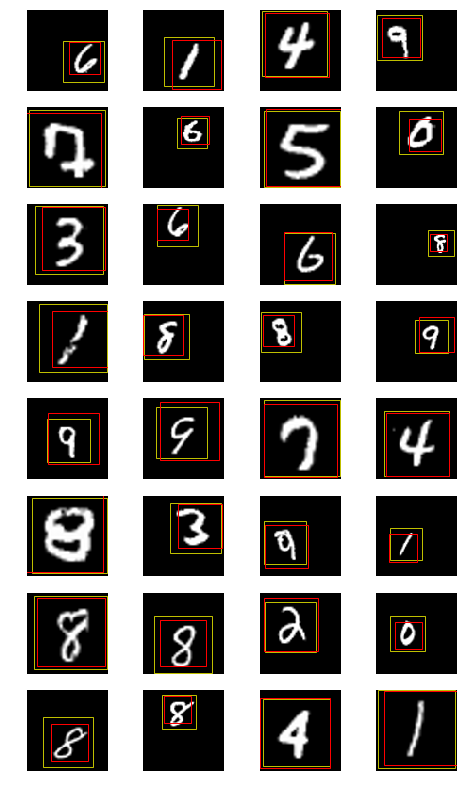

In [7]:
plot_results(batch, pred)